<a href="https://colab.research.google.com/github/mukthar56788/Data-science-projects/blob/main/CNN_using_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

In [ ]:
# Load Fashion-MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to [0, 1]
x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to include channel dimension (28, 28, 1) for CNN
x_train_full = x_train_full.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_full = tf.keras.utils.to_categorical(y_train_full, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into train and validation (80/20)
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Print shapes
print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)

x_train shape: (48000, 28, 28, 1)
x_valid shape: (12000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


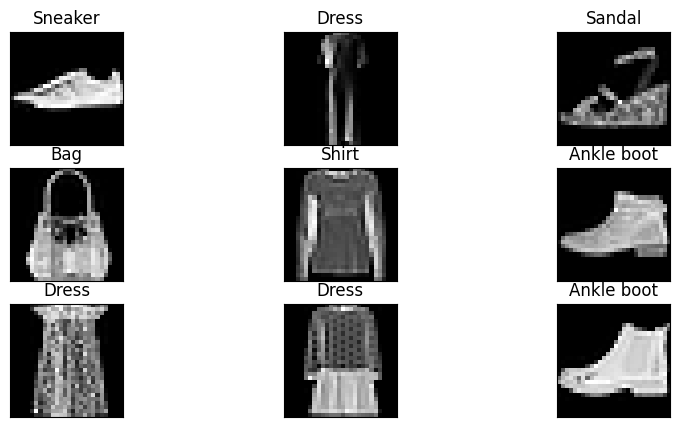

In [ ]:
# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a few training images
fig = plt.figure(figsize=(10, 5))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(class_names[np.argmax(y_train[i])])
plt.show()

In [ ]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(10, activation='softmax')  # 10 classes
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,410 (1.49 MB)

 Trainable params: 390,410 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',  # Adam often performs better than RMSprop for Fashion-MNIST
    metrics=['accuracy']
)

In [ ]:
# Set up checkpoint to save best weights
checkpointer = ModelCheckpoint(
    filepath='model.weights.best.keras',
    verbose=1,
    save_best_only=True
)

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,  # Fewer epochs than Oxford-IIIT; Fashion-MNIST converges faster
    validation_data=(x_valid, y_valid),
    callbacks=[checkpointer],
    verbose=2
)

Epoch 1/100

Epoch 1: val_loss improved from inf to 0.21971, saving model to model.weights.best.keras
1500/1500 - 6s - 4ms/step - accuracy: 0.9287 - loss: 0.1896 - val_accuracy: 0.9203 - val_loss: 0.2197
Epoch 2/100

Epoch 2: val_loss improved from 0.21971 to 0.20993, saving model to model.weights.best.keras
1500/1500 - 5s - 4ms/step - accuracy: 0.9340 - loss: 0.1749 - val_accuracy: 0.9224 - val_loss: 0.2099
Epoch 3/100

Epoch 3: val_loss did not improve from 0.20993
1500/1500 - 11s - 7ms/step - accuracy: 0.9359 - loss: 0.1679 - val_accuracy: 0.9214 - val_loss: 0.2211
Epoch 4/100

Epoch 4: val_loss improved from 0.20993 to 0.20956, saving model to model.weights.best.keras
1500/1500 - 10s - 7ms/step - accuracy: 0.9407 - loss: 0.1569 - val_accuracy: 0.9233 - val_loss: 0.2096
Epoch 5/100

Epoch 5: val_loss did not improve from 0.20956
1500/1500 - 6s - 4ms/step - accuracy: 0.9430 - loss: 0.1531 - val_accuracy: 0.9226 - val_loss: 0.2159
Epoch 6/100

Epoch 6: val_loss did not improve from 0.

In [ ]:
# Load best weights
model.load_weights('model.weights.best.keras')

# Evaluate on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('\nTest accuracy:', score[1])


Test accuracy: 0.9190000295639038


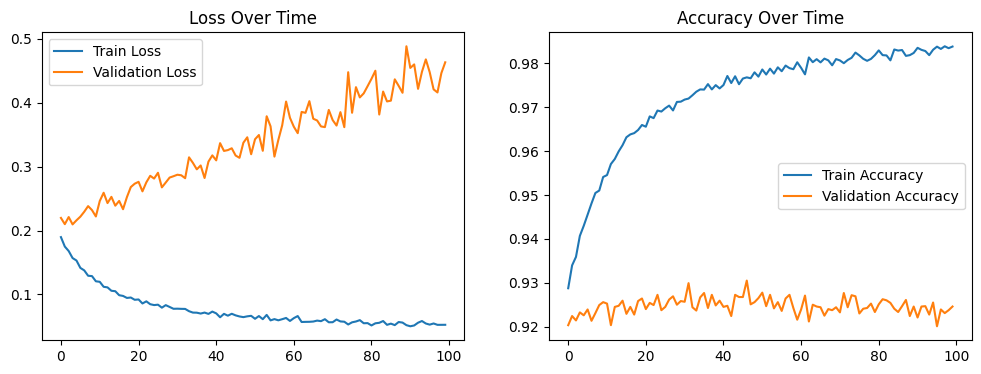

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Time')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.show()

Saving Screenshot 2025-04-09 231455.png to Screenshot 2025-04-09 231455 (1).png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


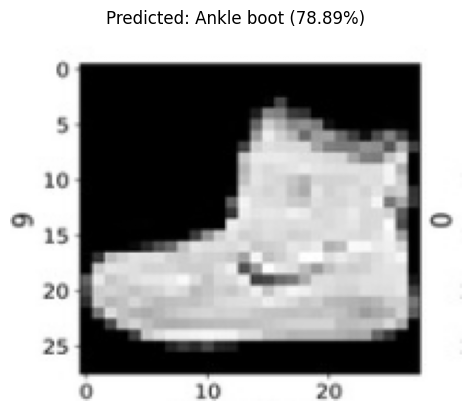

Predicted class: Ankle boot with confidence 78.89%


In [31]:
# Function to preprocess a single image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Upload an image
uploaded = files.upload()

# Process and predict
for filename in uploaded.keys():
    img_array = preprocess_image(filename)
    prediction = model.predict(img_array)
    pred_class_idx = np.argmax(prediction[0])
    confidence = prediction[0][pred_class_idx]
    pred_class = class_names[pred_class_idx]

    # Display image and prediction
    plt.figure()
    plt.imshow(image.load_img(filename, color_mode='grayscale'), cmap='gray')
    plt.title(f'Predicted: {pred_class} ({confidence:.2%})')
    plt.axis('off')
    plt.show()
    print(f'Predicted class: {pred_class} with confidence {confidence:.2%}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


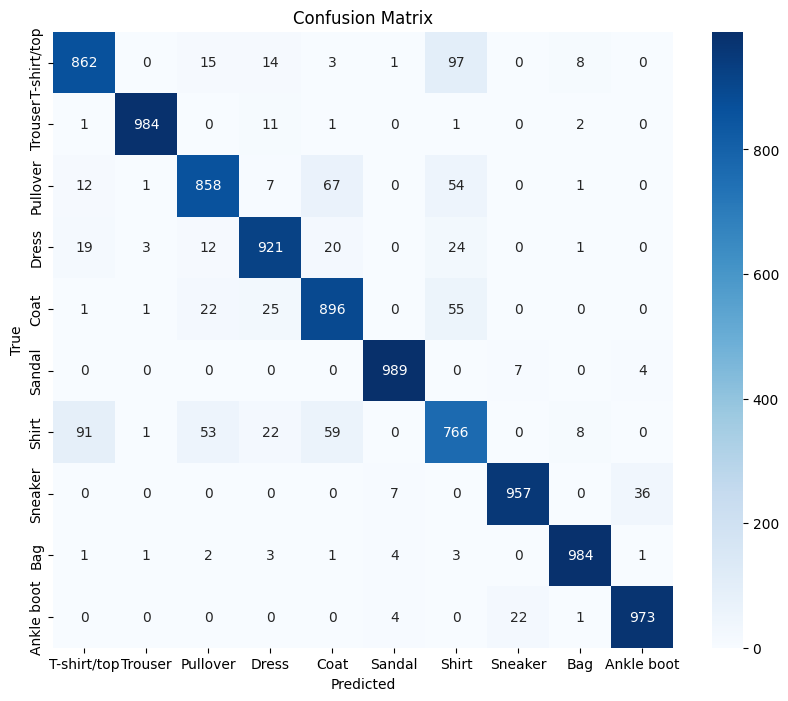

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Get predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()